https://matplotlib.org/stable/gallery/widgets/slider_demo.html

A : amplitude de la grandeur, appelée aussi valeur de crête, dans l'unité de la grandeur mesurée

ω : pulsation de la grandeur en rad s−1 

$ \omega =2\pi f={\frac {2\pi }{T}} $

ω t + φ : phase instantanée en rad

φ : phase à l'origine en rad (souvent fixée par l'expérimentateur)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Button, Slider

In [2]:
%matplotlib qt

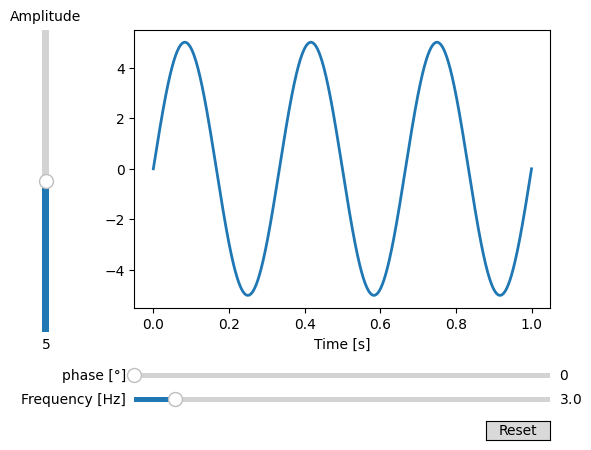

In [3]:
# The parametrized function to be plotted
def sin_function(t, amplitude, frequency, phase):
    return amplitude * np.sin(2 * np.pi * frequency * t + np.radians(phase) )

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(sin_function(t, amp_slider.val, freq_slider.val, phase_slider.val))
    fig.canvas.draw_idle()

# reset function
def reset(event):
    freq_slider.reset()
    amp_slider.reset()
    phase_slider.reset()


# Define initial parameters
init_amplitude = 5
init_frequency = 3
init_phase = 0

t = np.linspace(0, 1, 1000)

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, sin_function(t, init_amplitude, init_frequency, init_phase), lw=2)
ax.set_xlabel('Time [s]')
fig.subplots_adjust(left=0.25, bottom=0.3)     # adjust the main plot to make room for the sliders

# Add I/Q
# fig_I, ax_I = plt.subplots()
# line_I, = ax_I.plot(t, sin_function(t, init_amplitude, init_frequency), lw=2)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.02])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency)
freq_slider.on_changed(update)

# Make a horizontal slider to control the frequency.
axphase = fig.add_axes([0.25, 0.15, 0.65, 0.02])
phase_slider = Slider(
    ax=axphase,
    label='phase [°]',
    valmin=0,
    valmax=360,
    valinit=init_phase)
phase_slider.on_changed(update)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical")
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')
button.on_clicked(reset)

plt.show()